In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch as tch
from torch.utils.data import DataLoader
import torchvision.datasets as dt
import torchvision.transforms as trans
import torch.nn as nn

from time import time

In [3]:
train = dt.MNIST(root="./datasets", train=True, transform=trans.ToTensor(), download=True) 
test = dt.MNIST(root="./datasets", train=False, transform=trans.ToTensor(), download=True) 

In [4]:
print("No. of Training examples: ",len(train)) 
print("No. of Test examples: ",len(test)) 

No. of Training examples:  60000
No. of Test examples:  10000



The Number is :  7 



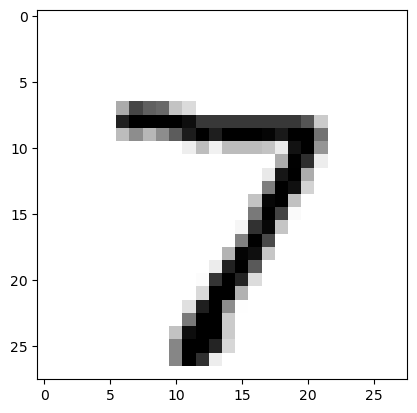

In [5]:
image,label = test[0] #to display the first image in test dataset along with its corresponding number
plt.imshow(image.numpy().squeeze(), cmap='gray_r');
print("\nThe Number is : " ,label,"\n")

In [20]:
print(image.shape) #shape of the image
print(type(label)) #shape of the label

torch.Size([1, 784])
<class 'int'>


In [6]:
train_batch = DataLoader(train, batch_size=30, shuffle=True) 

In [7]:
# 28 * 28 = 784
input = 784 
# 2/3 of 784 = 523.6
hidden = 490 
# Output = [0,1,2,3,4,5,6,7,8,9]
output = 10 

In [8]:
model = nn.Sequential(nn.Linear(input, hidden), 
                       nn.LeakyReLU(), 
                       nn.Linear(hidden, output), 
                        nn.LogSoftmax(dim=1)) 
lossfn = nn.NLLLoss()
optimize = tch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9) 

In [9]:
optimize = tch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9) 
time_start = time() 
epochs = 18 
for num in range(epochs): 
     run=0 
     for images, labels in train_batch: 
         images = images.view(images.shape[0], -1) 
         optimize.zero_grad() 
         output = model(images) 
         loss = lossfn(output, labels) 
         loss.backward() 
         optimize.step() 
         run += loss.item() 
     else: 
         print("Epoch Number : {} = Loss : {}".format(num, run/len(train_batch))) 
Elapsed=(time()-time_start)/60 
print("\nTraining Time (in minutes) : ",Elapsed) 

Epoch Number : 0 = Loss : 0.5090908165499568
Epoch Number : 1 = Loss : 0.25929593153111635
Epoch Number : 2 = Loss : 0.20480677374731748
Epoch Number : 3 = Loss : 0.16806457341322675
Epoch Number : 4 = Loss : 0.1421464279270731
Epoch Number : 5 = Loss : 0.12259190074680373
Epoch Number : 6 = Loss : 0.10794415134005249
Epoch Number : 7 = Loss : 0.09613242821837775
Epoch Number : 8 = Loss : 0.0862211503169965
Epoch Number : 9 = Loss : 0.07833972753060515
Epoch Number : 10 = Loss : 0.07147432494885288
Epoch Number : 11 = Loss : 0.06561983072722796
Epoch Number : 12 = Loss : 0.06048045613826253
Epoch Number : 13 = Loss : 0.05584723454748746
Epoch Number : 14 = Loss : 0.05183727597986581
Epoch Number : 15 = Loss : 0.04825646983407205
Epoch Number : 16 = Loss : 0.04501161235204199
Epoch Number : 17 = Loss : 0.041959020638896616

Training Time (in minutes) :  1.2832916855812073


In [10]:
correct=0
all = 0
for images,labels in test:
  img = images.view(1, 784)
  with tch.no_grad():
    logps = model(img)   
  ps = tch.exp(logps)
  probab = list(ps.numpy()[0])
  prediction = probab.index(max(probab))
  truth = labels
  if(truth == prediction):
    correct += 1
  all += 1


In [11]:
print("Number Of Images Tested : ", all)
print("Model Accuracy : ", (correct/all))

tch.save(model, './mnist_model.pt')

Number Of Images Tested :  10000
Model Accuracy :  0.9781


Predicted Digit = 0


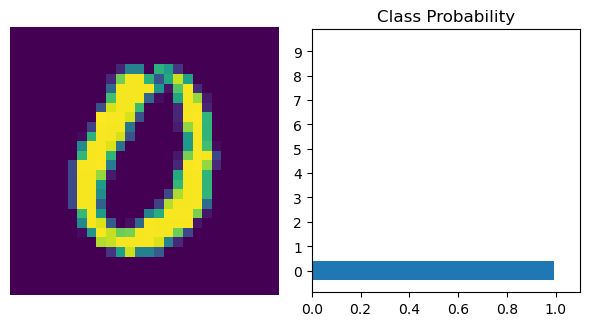

In [12]:
import numpy as np
def view_classify(img, ps):
    ps = ps.cpu().data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
img,label=train[np.random.randint(0,10001)] 
image=img.view(1, 784)
with tch.no_grad():
  logps = model(image)
ps = tch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(image.view(1, 28, 28), ps)